In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load in our data
big_df = pd.read_csv("../data/big_df.csv")
big_df = big_df.drop(columns="lev1")
big_df

C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (215,216) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,blue_CtrlDiff,red_CtrlDiff,blue_CtrlSecPerMin,red_CtrlSecPerMin,blue_CtrldSecPerMin,red_CtrldSecPerMin,blue_DOB,red_DOB,blue_KDsPer100Stk,red_KDsPer100Stk,...,blue_SoS,red_SoS,winner,weight_class,title_fight,event,date,method,location,index
0,13.050734,-1.564451,17.343435,0.793243,4.292702,2.357694,1993-09-20,1991-04-21,0.148368,1.253918,...,0.683544,0.655172,tbd,Men's Middleweight,0,UFC Fight Night: Costa vs. Vettori,2021-10-23,tbd,"Las Vegas, Nevada, US",0
1,-1.920177,33.809255,10.307155,36.636569,12.227331,2.827314,1989-04-12,1994-02-20,0.753769,0.000000,...,0.603774,0.750000,tbd,Men's Lightweight,0,UFC Fight Night: Costa vs. Vettori,2021-10-23,tbd,"Las Vegas, Nevada, US",1
2,-27.700000,6.684600,2.366667,15.790182,30.066667,9.105582,1995-09-29,1987-11-28,0.000000,0.000000,...,0.600000,0.380952,tbd,Women's Bantamweight,0,UFC Fight Night: Costa vs. Vettori,2021-10-23,tbd,"Las Vegas, Nevada, US",2
3,-11.352254,-6.521814,11.385643,7.953432,22.737896,14.475246,1992-11-03,1988-06-20,1.010101,0.336984,...,0.500000,0.557377,tbd,Men's Featherweight,0,UFC Fight Night: Costa vs. Vettori,2021-10-23,tbd,"Las Vegas, Nevada, US",3
4,-4.677060,-0.624211,1.966274,10.936316,6.643334,11.560527,1984-09-14,1978-08-24,1.234568,0.586166,...,0.590909,0.631902,tbd,Men's Welterweight,0,UFC Fight Night: Costa vs. Vettori,2021-10-23,tbd,"Las Vegas, Nevada, US",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900-01-01,1900-01-01,0.000000,0.000000,...,0.000000,0.000000,red,Openweight,0,UFC 2: No Way Out,1994-03-11,KO/TKO,"Denver, Colorado, US",6310
6308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900-01-01,1900-01-01,0.000000,0.000000,...,0.000000,0.000000,red,Openweight,0,UFC 2: No Way Out,1994-03-11,Submission,"Denver, Colorado, US",6311
6309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900-01-01,1900-01-01,0.000000,0.000000,...,0.000000,0.000000,red,Openweight,0,UFC 2: No Way Out,1994-03-11,KO/TKO,"Denver, Colorado, US",6312
6310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900-01-01,1963-08-28,0.000000,0.000000,...,0.000000,0.000000,red,Openweight,0,UFC 2: No Way Out,1994-03-11,Submission,"Denver, Colorado, US",6313


In [3]:
# removing fights that have not taken place yet
df = big_df[big_df["winner"] != "tbd"]
df

,blue_CtrlDiff,red_CtrlDiff,blue_CtrlSecPerMin,red_CtrlSecPerMin,blue_CtrldSecPerMin,red_CtrldSecPerMin,blue_DOB,red_DOB,blue_KDsPer100Stk,red_KDsPer100Stk,...,blue_SoS,red_SoS,winner,weight_class,title_fight,event,date,method,location,index
12,7.727499,10.163043,13.754351,26.630435,6.026852,16.467391,1990-10-01,1995-03-01,0.598802,0.520833,...,0.466667,0.714286,blue,Women's Featherweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",14
13,-7.783333,-5.288595,2.183333,5.023857,9.966667,10.312452,1995-01-12,1979-02-04,0.000000,0.841043,...,0.466667,0.664975,red,Men's Heavyweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",15
14,0.000000,-3.615926,0.000000,13.705309,0.000000,17.321235,1992-01-20,1983-08-30,0.000000,0.306435,...,0.000000,0.636086,red,Men's Lightweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,KO/TKO,"Las Vegas, Nevada, US",16
15,-26.203209,7.178988,3.288770,7.295720,29.491979,0.116732,1991-08-22,1990-02-17,0.000000,0.729927,...,0.571429,0.000000,red,Women's Flyweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",17
16,12.971311,-6.327078,12.971311,3.324397,0.000000,9.651475,1995-02-22,1988-06-06,1.851852,0.000000,...,0.666667,0.592593,red,Men's Featherweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,Submission,"Las Vegas, Nevada, US",18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900-01-01,1900-01-01,0.000000,0.000000,...,0.000000,0.000000,red,Openweight,0,UFC 2: No Way Out,1994-03-11,KO/TKO,"Denver, Colorado, US",6310
6308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900-01-01,1900-01-01,0.000000,0.000000,...,0.000000,0.000000,red,Openweight,0,UFC 2: No Way Out,1994-03-11,Submission,"Denver, Colorado, US",6311
6309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900-01-01,1900-01-01,0.000000,0.000000,...,0.000000,0.000000,red,Openweight,0,UFC 2: No Way Out,1994-03-11,KO/TKO,"Denver, Colorado, US",6312
6310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900-01-01,1963-08-28,0.000000,0.000000,...,0.000000,0.000000,red,Openweight,0,UFC 2: No Way Out,1994-03-11,Submission,"Denver, Colorado, US",6313


In [4]:
# Dropping all fights that occured before unified rules were implamented 
df["date"] = pd.to_datetime(df["date"])
df = df[df["date"] >= "November 17, 2000"]
df

C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,blue_CtrlDiff,red_CtrlDiff,blue_CtrlSecPerMin,red_CtrlSecPerMin,blue_CtrldSecPerMin,red_CtrldSecPerMin,blue_DOB,red_DOB,blue_KDsPer100Stk,red_KDsPer100Stk,...,blue_SoS,red_SoS,winner,weight_class,title_fight,event,date,method,location,index
12,7.727499,10.163043,13.754351,26.630435,6.026852,16.467391,1990-10-01,1995-03-01,0.598802,0.520833,...,0.466667,0.714286,blue,Women's Featherweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",14
13,-7.783333,-5.288595,2.183333,5.023857,9.966667,10.312452,1995-01-12,1979-02-04,0.000000,0.841043,...,0.466667,0.664975,red,Men's Heavyweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",15
14,0.000000,-3.615926,0.000000,13.705309,0.000000,17.321235,1992-01-20,1983-08-30,0.000000,0.306435,...,0.000000,0.636086,red,Men's Lightweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,KO/TKO,"Las Vegas, Nevada, US",16
15,-26.203209,7.178988,3.288770,7.295720,29.491979,0.116732,1991-08-22,1990-02-17,0.000000,0.729927,...,0.571429,0.000000,red,Women's Flyweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",17
16,12.971311,-6.327078,12.971311,3.324397,0.000000,9.651475,1995-02-22,1988-06-06,1.851852,0.000000,...,0.666667,0.592593,red,Men's Featherweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,Submission,"Las Vegas, Nevada, US",18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1976-11-20,1977-11-10,0.000000,0.000000,...,0.000000,0.000000,red,Men's Heavyweight,0,UFC 28: High Stakes,2000-11-17,KO/TKO,"Atlantic City, New Jersey, US",6078
6076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1974-11-12,1979-02-04,0.000000,0.000000,...,0.000000,0.000000,red,Men's Heavyweight,0,UFC 28: High Stakes,2000-11-17,Submission,"Atlantic City, New Jersey, US",6079
6077,19.282219,21.601224,19.575856,25.976543,0.293638,4.375319,1900-01-01,1974-12-06,0.000000,0.000000,...,0.000000,0.000000,red,Men's Lightweight,0,UFC 28: High Stakes,2000-11-17,KO/TKO,"Atlantic City, New Jersey, US",6080
6078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900-01-01,1973-10-13,0.000000,0.000000,...,0.000000,0.000000,red,Men's Middleweight,0,UFC 28: High Stakes,2000-11-17,UD,"Atlantic City, New Jersey, US",6081


In [5]:
df["red_age"] = pd.Series(df["red_age"], dtype="int")
df["blue_age"] = pd.Series(df["blue_age"], dtype="int")
df["red_heightIN"] = pd.Series(df["red_heightIN"], dtype="int")
df["blue_heightIN"] = pd.Series(df["blue_heightIN"], dtype="int")
df

C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,blue_CtrlDiff,red_CtrlDiff,blue_CtrlSecPerMin,red_CtrlSecPerMin,blue_CtrldSecPerMin,red_CtrldSecPerMin,blue_DOB,red_DOB,blue_KDsPer100Stk,red_KDsPer100Stk,...,blue_SoS,red_SoS,winner,weight_class,title_fight,event,date,method,location,index
12,7.727499,10.163043,13.754351,26.630435,6.026852,16.467391,1990-10-01,1995-03-01,0.598802,0.520833,...,0.466667,0.714286,blue,Women's Featherweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",14
13,-7.783333,-5.288595,2.183333,5.023857,9.966667,10.312452,1995-01-12,1979-02-04,0.000000,0.841043,...,0.466667,0.664975,red,Men's Heavyweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",15
14,0.000000,-3.615926,0.000000,13.705309,0.000000,17.321235,1992-01-20,1983-08-30,0.000000,0.306435,...,0.000000,0.636086,red,Men's Lightweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,KO/TKO,"Las Vegas, Nevada, US",16
15,-26.203209,7.178988,3.288770,7.295720,29.491979,0.116732,1991-08-22,1990-02-17,0.000000,0.729927,...,0.571429,0.000000,red,Women's Flyweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",17
16,12.971311,-6.327078,12.971311,3.324397,0.000000,9.651475,1995-02-22,1988-06-06,1.851852,0.000000,...,0.666667,0.592593,red,Men's Featherweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,Submission,"Las Vegas, Nevada, US",18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1976-11-20,1977-11-10,0.000000,0.000000,...,0.000000,0.000000,red,Men's Heavyweight,0,UFC 28: High Stakes,2000-11-17,KO/TKO,"Atlantic City, New Jersey, US",6078
6076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1974-11-12,1979-02-04,0.000000,0.000000,...,0.000000,0.000000,red,Men's Heavyweight,0,UFC 28: High Stakes,2000-11-17,Submission,"Atlantic City, New Jersey, US",6079
6077,19.282219,21.601224,19.575856,25.976543,0.293638,4.375319,1900-01-01,1974-12-06,0.000000,0.000000,...,0.000000,0.000000,red,Men's Lightweight,0,UFC 28: High Stakes,2000-11-17,KO/TKO,"Atlantic City, New Jersey, US",6080
6078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900-01-01,1973-10-13,0.000000,0.000000,...,0.000000,0.000000,red,Men's Middleweight,0,UFC 28: High Stakes,2000-11-17,UD,"Atlantic City, New Jersey, US",6081


In [6]:
df = df[df["red_age"] < 75]
df = df[df["blue_age"] < 75]
df

,blue_CtrlDiff,red_CtrlDiff,blue_CtrlSecPerMin,red_CtrlSecPerMin,blue_CtrldSecPerMin,red_CtrldSecPerMin,blue_DOB,red_DOB,blue_KDsPer100Stk,red_KDsPer100Stk,...,blue_SoS,red_SoS,winner,weight_class,title_fight,event,date,method,location,index
12,7.727499,10.163043,13.754351,26.630435,6.026852,16.467391,1990-10-01,1995-03-01,0.598802,0.520833,...,0.466667,0.714286,blue,Women's Featherweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",14
13,-7.783333,-5.288595,2.183333,5.023857,9.966667,10.312452,1995-01-12,1979-02-04,0.000000,0.841043,...,0.466667,0.664975,red,Men's Heavyweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",15
14,0.000000,-3.615926,0.000000,13.705309,0.000000,17.321235,1992-01-20,1983-08-30,0.000000,0.306435,...,0.000000,0.636086,red,Men's Lightweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,KO/TKO,"Las Vegas, Nevada, US",16
15,-26.203209,7.178988,3.288770,7.295720,29.491979,0.116732,1991-08-22,1990-02-17,0.000000,0.729927,...,0.571429,0.000000,red,Women's Flyweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",17
16,12.971311,-6.327078,12.971311,3.324397,0.000000,9.651475,1995-02-22,1988-06-06,1.851852,0.000000,...,0.666667,0.592593,red,Men's Featherweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,Submission,"Las Vegas, Nevada, US",18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6072,32.600000,3.012552,42.300000,4.447101,9.700000,1.434549,1971-01-18,1969-12-17,0.000000,0.000000,...,0.000000,0.333333,red,Men's Middleweight,0,UFC 29: Defense of the Belts,2000-12-16,UD,"Tokyo, Japan",6075
6073,16.957746,0.000000,17.943662,0.000000,0.985915,0.000000,1971-08-10,1963-06-22,0.000000,0.000000,...,0.833333,1.000000,red,Men's Heavyweight,1,UFC 28: High Stakes,2000-11-17,KO/TKO,"Atlantic City, New Jersey, US",6076
6074,-5.681330,0.000000,5.793991,0.000000,11.475322,0.000000,1961-12-13,1975-09-07,0.000000,0.000000,...,0.760000,0.000000,red,Men's Heavyweight,0,UFC 28: High Stakes,2000-11-17,MD,"Atlantic City, New Jersey, US",6077
6075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1976-11-20,1977-11-10,0.000000,0.000000,...,0.000000,0.000000,red,Men's Heavyweight,0,UFC 28: High Stakes,2000-11-17,KO/TKO,"Atlantic City, New Jersey, US",6078


In [7]:
df = df[df["red_heightIN"] < 100]
df = df[df["blue_heightIN"] < 100]
df

,blue_CtrlDiff,red_CtrlDiff,blue_CtrlSecPerMin,red_CtrlSecPerMin,blue_CtrldSecPerMin,red_CtrldSecPerMin,blue_DOB,red_DOB,blue_KDsPer100Stk,red_KDsPer100Stk,...,blue_SoS,red_SoS,winner,weight_class,title_fight,event,date,method,location,index
12,7.727499,10.163043,13.754351,26.630435,6.026852,16.467391,1990-10-01,1995-03-01,0.598802,0.520833,...,0.466667,0.714286,blue,Women's Featherweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",14
13,-7.783333,-5.288595,2.183333,5.023857,9.966667,10.312452,1995-01-12,1979-02-04,0.000000,0.841043,...,0.466667,0.664975,red,Men's Heavyweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",15
14,0.000000,-3.615926,0.000000,13.705309,0.000000,17.321235,1992-01-20,1983-08-30,0.000000,0.306435,...,0.000000,0.636086,red,Men's Lightweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,KO/TKO,"Las Vegas, Nevada, US",16
15,-26.203209,7.178988,3.288770,7.295720,29.491979,0.116732,1991-08-22,1990-02-17,0.000000,0.729927,...,0.571429,0.000000,red,Women's Flyweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",17
16,12.971311,-6.327078,12.971311,3.324397,0.000000,9.651475,1995-02-22,1988-06-06,1.851852,0.000000,...,0.666667,0.592593,red,Men's Featherweight,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,Submission,"Las Vegas, Nevada, US",18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6072,32.600000,3.012552,42.300000,4.447101,9.700000,1.434549,1971-01-18,1969-12-17,0.000000,0.000000,...,0.000000,0.333333,red,Men's Middleweight,0,UFC 29: Defense of the Belts,2000-12-16,UD,"Tokyo, Japan",6075
6073,16.957746,0.000000,17.943662,0.000000,0.985915,0.000000,1971-08-10,1963-06-22,0.000000,0.000000,...,0.833333,1.000000,red,Men's Heavyweight,1,UFC 28: High Stakes,2000-11-17,KO/TKO,"Atlantic City, New Jersey, US",6076
6074,-5.681330,0.000000,5.793991,0.000000,11.475322,0.000000,1961-12-13,1975-09-07,0.000000,0.000000,...,0.760000,0.000000,red,Men's Heavyweight,0,UFC 28: High Stakes,2000-11-17,MD,"Atlantic City, New Jersey, US",6077
6075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1976-11-20,1977-11-10,0.000000,0.000000,...,0.000000,0.000000,red,Men's Heavyweight,0,UFC 28: High Stakes,2000-11-17,KO/TKO,"Atlantic City, New Jersey, US",6078


In [8]:
# Label encoder for stance and weight class
number = LabelEncoder()
# data['red_name'] = number.fit_transform(data['red_name'].astype('str'))
# data['blue_name'] = number.fit_transform(data['blue_name'].astype('str'))
df['red_stance'] = number.fit_transform(df['red_stance'].astype('str'))
df['blue_stance'] = number.fit_transform(df['blue_stance'].astype('str'))
df['weight_class'] = number.fit_transform(df['weight_class'].astype('str'))
df

,blue_CtrlDiff,red_CtrlDiff,blue_CtrlSecPerMin,red_CtrlSecPerMin,blue_CtrldSecPerMin,red_CtrldSecPerMin,blue_DOB,red_DOB,blue_KDsPer100Stk,red_KDsPer100Stk,...,blue_SoS,red_SoS,winner,weight_class,title_fight,event,date,method,location,index
12,7.727499,10.163043,13.754351,26.630435,6.026852,16.467391,1990-10-01,1995-03-01,0.598802,0.520833,...,0.466667,0.714286,blue,10,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",14
13,-7.783333,-5.288595,2.183333,5.023857,9.966667,10.312452,1995-01-12,1979-02-04,0.000000,0.841043,...,0.466667,0.664975,red,4,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",15
14,0.000000,-3.615926,0.000000,13.705309,0.000000,17.321235,1992-01-20,1983-08-30,0.000000,0.306435,...,0.000000,0.636086,red,6,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,KO/TKO,"Las Vegas, Nevada, US",16
15,-26.203209,7.178988,3.288770,7.295720,29.491979,0.116732,1991-08-22,1990-02-17,0.000000,0.729927,...,0.571429,0.000000,red,11,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,UD,"Las Vegas, Nevada, US",17
16,12.971311,-6.327078,12.971311,3.324397,0.000000,9.651475,1995-02-22,1988-06-06,1.851852,0.000000,...,0.666667,0.592593,red,2,0,UFC Fight Night: Ladd vs. Dumont,2021-10-16,Submission,"Las Vegas, Nevada, US",18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6072,32.600000,3.012552,42.300000,4.447101,9.700000,1.434549,1971-01-18,1969-12-17,0.000000,0.000000,...,0.000000,0.333333,red,7,0,UFC 29: Defense of the Belts,2000-12-16,UD,"Tokyo, Japan",6075
6073,16.957746,0.000000,17.943662,0.000000,0.985915,0.000000,1971-08-10,1963-06-22,0.000000,0.000000,...,0.833333,1.000000,red,4,1,UFC 28: High Stakes,2000-11-17,KO/TKO,"Atlantic City, New Jersey, US",6076
6074,-5.681330,0.000000,5.793991,0.000000,11.475322,0.000000,1961-12-13,1975-09-07,0.000000,0.000000,...,0.760000,0.000000,red,4,0,UFC 28: High Stakes,2000-11-17,MD,"Atlantic City, New Jersey, US",6077
6075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1976-11-20,1977-11-10,0.000000,0.000000,...,0.000000,0.000000,red,4,0,UFC 28: High Stakes,2000-11-17,KO/TKO,"Atlantic City, New Jersey, US",6078


In [9]:
# removing draws and no contests 
df = df[df["winner"] != "Draw"] # it's arguable draws are useful datapoints, but I choose to remove them
df = df[df["winner"] != "NC"] # no contests however are not useful datapoints
df["winner"].value_counts()

red     3863
blue    2042
Name: winner, dtype: int64

In [10]:
df = df[df["method"] != "DQ"]
df["method"].value_counts()

UD            2156
KO/TKO        1962
Submission    1150
SD             576
MD              43
Name: method, dtype: int64

In [11]:
# setting our X and y values
X = df.drop(columns=["winner", "red_name", "blue_name", "date", "event", "red_DOB", "blue_DOB", "method", "location", \
                    "red_nickname", "blue_nickname", "red_weight", "blue_weight", "index"])
y = df["winner"]
feature_names = X.columns

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.575
k: 3, Train/Test Score: 0.795/0.588
k: 5, Train/Test Score: 0.753/0.598
k: 7, Train/Test Score: 0.729/0.620
k: 9, Train/Test Score: 0.720/0.609
k: 11, Train/Test Score: 0.705/0.613
k: 13, Train/Test Score: 0.703/0.615
k: 15, Train/Test Score: 0.692/0.632
k: 17, Train/Test Score: 0.689/0.633
k: 19, Train/Test Score: 0.684/0.635
k: 21, Train/Test Score: 0.681/0.631
k: 23, Train/Test Score: 0.680/0.636
k: 25, Train/Test Score: 0.677/0.633
k: 27, Train/Test Score: 0.677/0.634
k: 29, Train/Test Score: 0.681/0.637
k: 31, Train/Test Score: 0.680/0.640
k: 33, Train/Test Score: 0.677/0.641
k: 35, Train/Test Score: 0.673/0.642
k: 37, Train/Test Score: 0.673/0.641
k: 39, Train/Test Score: 0.672/0.644


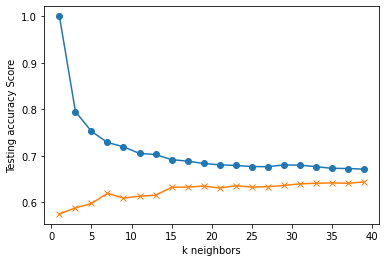

In [15]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k) # setting our classifier
    knn.fit(X_train_scaled, y_train) # fitting
    train_score = knn.score(X_train_scaled, y_train) # train score
    test_score = knn.score(X_test_scaled, y_test) # test score
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# plot for our model
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [16]:
# looks like our best spot is k = 17
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))


k=15 Test Acc: 0.632
